In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('chess_games.csv')

In [4]:
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


questions i have:
who wins more white or black (bar or pie)
the percentage of winning by winning style (horizontal stacked bar chart)


In [5]:
df.isna().sum()

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

In [6]:
df.duplicated().sum()

429

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df['average_rating'] = (df['white_rating'] + df['black_rating'])/2
df['elo_difference'] = abs(df['white_rating'] - df['black_rating'])
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,average_rating,elo_difference
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,1345.5,309
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,1291.5,61
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,1498.0,4
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,1446.5,15
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,1496.0,54


In [9]:
df['average_rating'].min(), df['average_rating'].max()

(816.5, 2475.5)

In [10]:
def elo_range(df):
    if df['average_rating'] > 

SyntaxError: invalid syntax (163625946.py, line 2)

In [15]:
df_times = df[['created_at', 'last_move_at']].copy()
df_times['created_at_dt'] = pd.to_datetime(df_times['created_at']/1000, unit = 's', origin='unix')
df_times['last_move_at_dt'] = pd.to_datetime(df_times['last_move_at']/1000, unit = 's', origin='unix')
df_times

,created_at,last_move_at,created_at_dt,last_move_at_dt
0,1.504210e+12,1.504210e+12,2017-08-31 20:06:40.000000000,2017-08-31 20:06:40.000000000
1,1.504130e+12,1.504130e+12,2017-08-30 21:53:20.000000000,2017-08-30 21:53:20.000000000
2,1.504130e+12,1.504130e+12,2017-08-30 21:53:20.000000000,2017-08-30 21:53:20.000000000
3,1.504110e+12,1.504110e+12,2017-08-30 16:20:00.000000000,2017-08-30 16:20:00.000000000
4,1.504030e+12,1.504030e+12,2017-08-29 18:06:40.000000000,2017-08-29 18:06:40.000000000
...,...,...,...,...
20053,1.499791e+12,1.499791e+12,2017-07-11 16:35:14.342000008,2017-07-11 16:40:36.075999975
20054,1.499698e+12,1.499699e+12,2017-07-10 14:48:09.759999990,2017-07-10 15:00:33.979000092
20055,1.499698e+12,1.499698e+12,2017-07-10 14:44:37.493000031,2017-07-10 14:47:30.326999903
20056,1.499696e+12,1.499697e+12,2017-07-10 14:15:27.019000053,2017-07-10 14:31:13.717999935


<Axes: xlabel='victory_status', ylabel='proportion'>

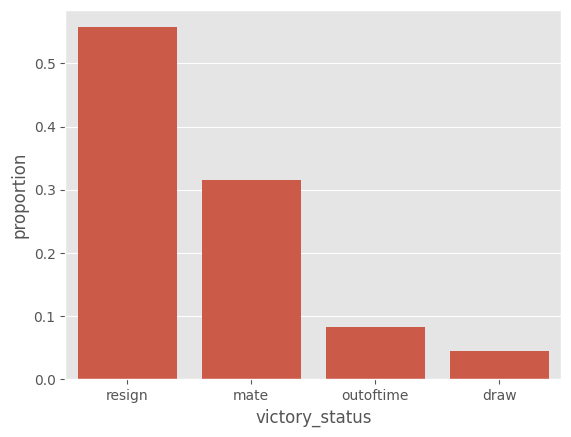

In [13]:
plt.style.use('ggplot')
sns.barplot(df['victory_status'].value_counts(normalize=True))

C:\Users\Daniel\AppData\Local\Temp\ipykernel_25012\205606592.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df['winner'].value_counts(normalize=True), palette=colors)


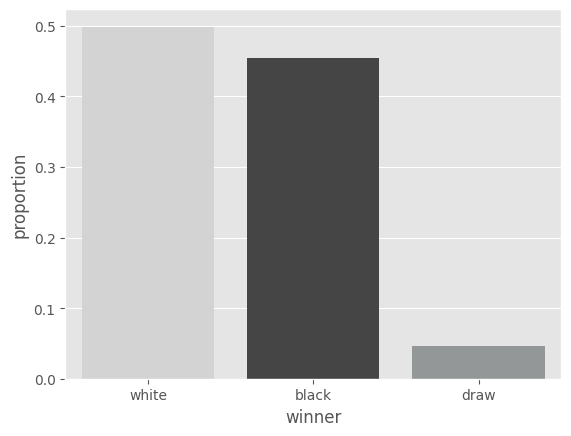

In [11]:
colors = ['#D3D3D3', '#454545','#939799']
sns.barplot(df['winner'].value_counts(normalize=True), palette=colors)
plt.style.use('classic')

C:\Users\Daniel\AppData\Local\Temp\ipykernel_25012\2739741309.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df['winner'].value_counts(normalize=True), palette=colors)


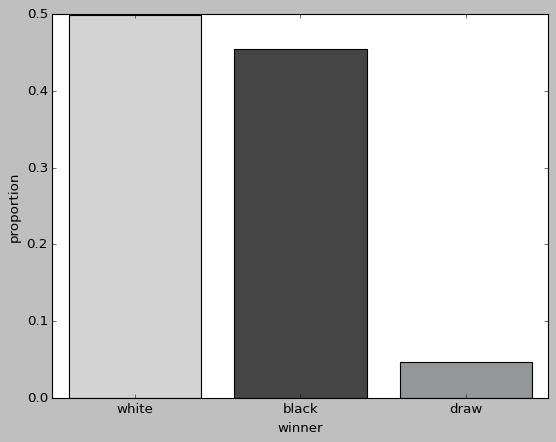

In [15]:
colors = ['#D3D3D3', '#454545','#939799']
sns.barplot(df['winner'].value_counts(normalize=True), palette=colors)
plt.style.use('ggplot')

C:\Users\Daniel\AppData\Local\Temp\ipykernel_27020\829019240.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(winner_counts, x = 'winner', y = 'percentage', palette=colors)


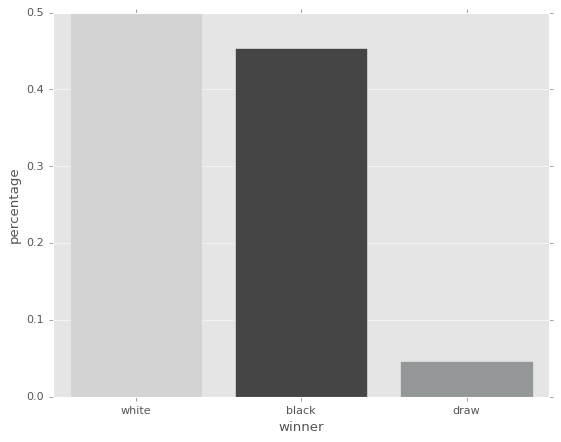

: 

In [17]:
winner_counts = df['winner'].value_counts(normalize=True).reset_index()  
winner_counts.columns = ['winner', 'percentage']
colors = ['#D3D3D3', '#454545','#939799']

sns.barplot(winner_counts, x = 'winner', y = 'percentage', palette=colors)
plt.style.use('ggplot')

C:\Users\Daniel\AppData\Local\Temp\ipykernel_25420\2595863137.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='winner', y='percentage', data=winner_counts, palette=colors)
C:\Users\Daniel\AppData\Local\Temp\ipykernel_25420\2595863137.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{int(y)}%" for y in ax.get_yticks()])


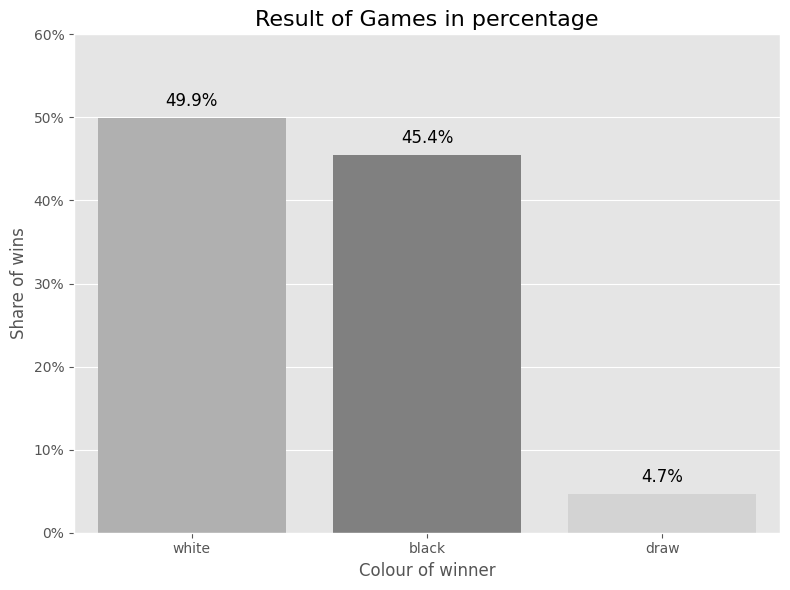

: 

In [44]:
winner_counts = df['winner'].value_counts(normalize=True).reset_index()
winner_counts.columns = ['winner', 'percentage']

# Convert percentage to a more readable form (multiply by 100)
winner_counts['percentage'] = winner_counts['percentage'] * 100

# Set ggplot style
plt.style.use('ggplot')

# Custom light gray colors
colors = ['#b0b0b0', '#808080', '#d3d3d3']  # light gray, gray, and light gray for draw

# Create bar plot with custom colors
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='winner', y='percentage', data=winner_counts, palette=colors)

# Annotate bars with percentages
for i, row in winner_counts.iterrows():
    ax.text(i, row['percentage'] + 1, f"{row['percentage']:.1f}%", ha='center', va='bottom', fontsize=12, color='black')

# Add labels and titles
ax.set_title("Result of Games in percentage", fontsize=16)
ax.set_xlabel("Colour of winner", fontsize=12)
ax.set_ylabel("Share of wins", fontsize=12)

# Adjust y-axis to percentage format
ax.set_ylim(0, 60)
ax.set_yticklabels([f"{int(y)}%" for y in ax.get_yticks()])

# Show the plot 
plt.tight_layout()
plt.show()

50.88537368179734
46.437872535534154
5.676753782668501
